## [Problem 1] Understanding the content of the competition

Home Credit dataset

1. What kind of company is Home Credit?
    Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience.
2. What do you expect in this competition?
    Prediction their clients' repayment abilities and unlock the full potential of their data.
3. What are the benefits companies can get by predicting that?
    Doing so will ensure that clients capable of repayment are not rejected 
    and that loans are given with a principal, maturity, 
    and repayment calendar that will empower their clients to be successful.
'''

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
from pathlib import Path  

In [5]:
application_train = pd.read_csv("data/home_credit/application_train.csv")

## [Problem 2] Understanding the overview of data

In [6]:
print("============ head() ===============")
print(application_train.head())
print("============ describe() ===============")
print(application_train.describe())
print("============ info() ===============")
print(application_train.info)
print('============ column names ==============')
print('total feature types: {}'.format(application_train.shape[0]), list(application_train.columns.values))

============ head() ===============
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0

## [Problem 3] Defining issues

============ missing value information ===============
total data length is 307511
                           Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_AVG   213514  69.432963
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
FONDKAPREMONT_MODE        210295  68.386172
LIVINGAPARTMENTS_MEDI     210199  68.354953
LIVINGAPARTMENTS_MODE     210199  68.354953
LIVINGAPARTMENTS_AVG      210199  68.354953
============ the percentage of classes ===============


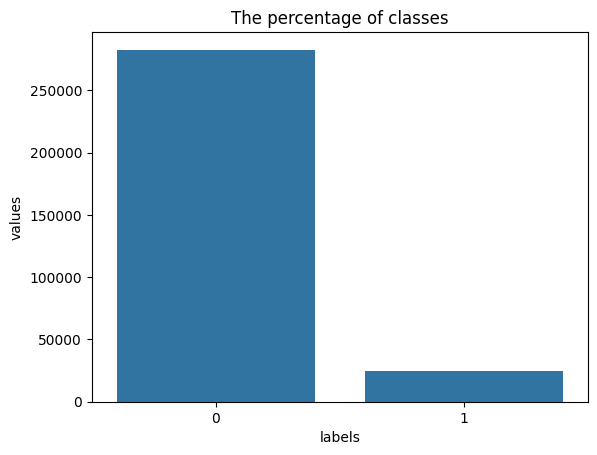

From the barplot of target, this dataset is unbalanced dataset
1. Dataset is an unbalanced        2. Almost half of feature has missing values about 50 percent         3. Majority of the clients have Secondary / secondary special education, followed by clients with Higher education.             In terms of percentage of not repayment of loan, lower secondarty has the highest percent of not repayment (10%), with academic the lowest.        4. Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.            The applicants with the type of income Maternity leave have almost (40%) ratio of not returning loans, followed by Unemployed (37%).         5. Most of applicants for loans are income from Working, and the type of income Maternity leave and Unemployed have almost (77%) ratio of not returning loans


In [7]:
print("============ missing value information ===============")
print("total data length is {}".format(len(application_train)))

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_info = missing_data(application_train)
print(missing_info.head(10))
filepath = Path('out.csv')  
missing_info.to_csv(filepath,index = False)

print("============ the percentage of classes ===============")

temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.title('The percentage of classes')
sns.barplot(x = 'labels', y="values", data=df)
#locs, labels = plt.xticks()
plt.show()

print('From the barplot of target, this dataset is unbalanced dataset')

# Project setting
print('1. Dataset is an unbalanced \
       2. Almost half of feature has missing values about 50 percent \
        3. Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. \
            In terms of percentage of not repayment of loan, lower secondarty has the highest percent of not repayment (10%), with academic the lowest.\
        4. Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.\
            The applicants with the type of income Maternity leave have almost (40%) ratio of not returning loans, followed by Unemployed (37%). \
        5. Most of applicants for loans are income from Working, and the type of income Maternity leave and Unemployed have almost (77%) ratio of not returning loans')



## [Problem 4] Data exploration

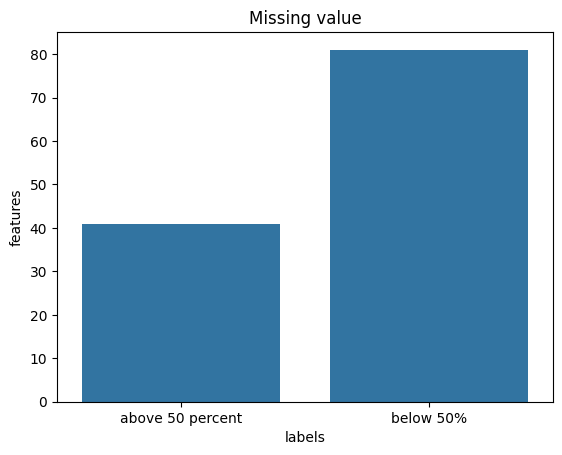

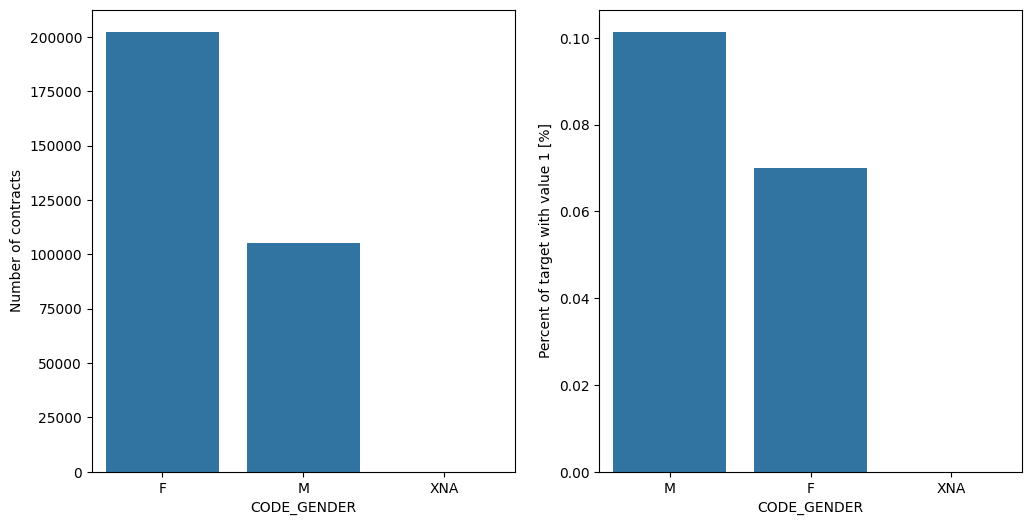

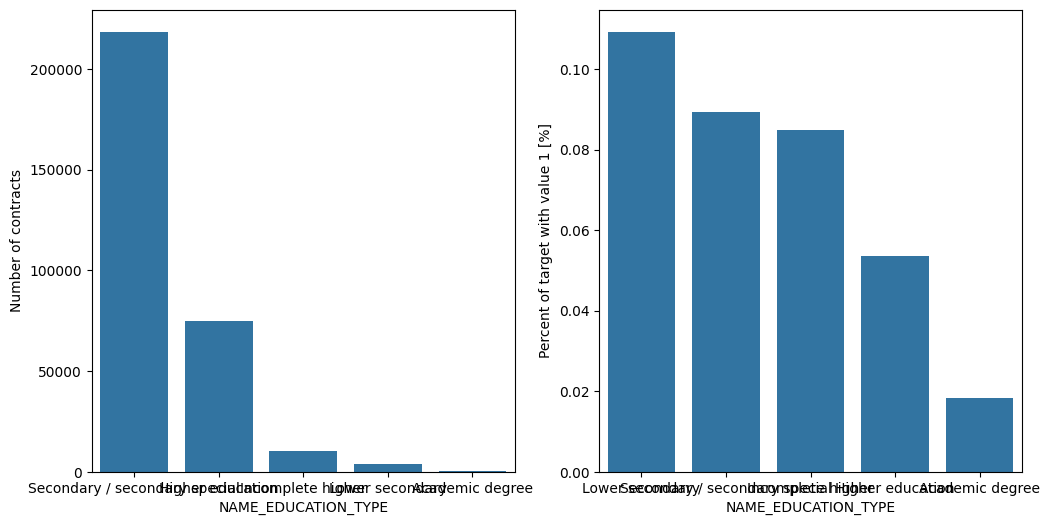

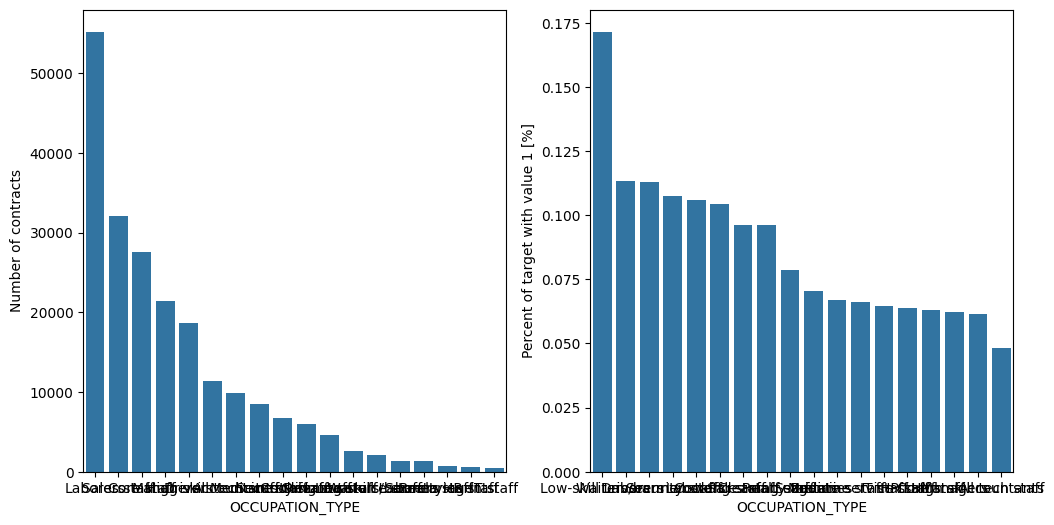

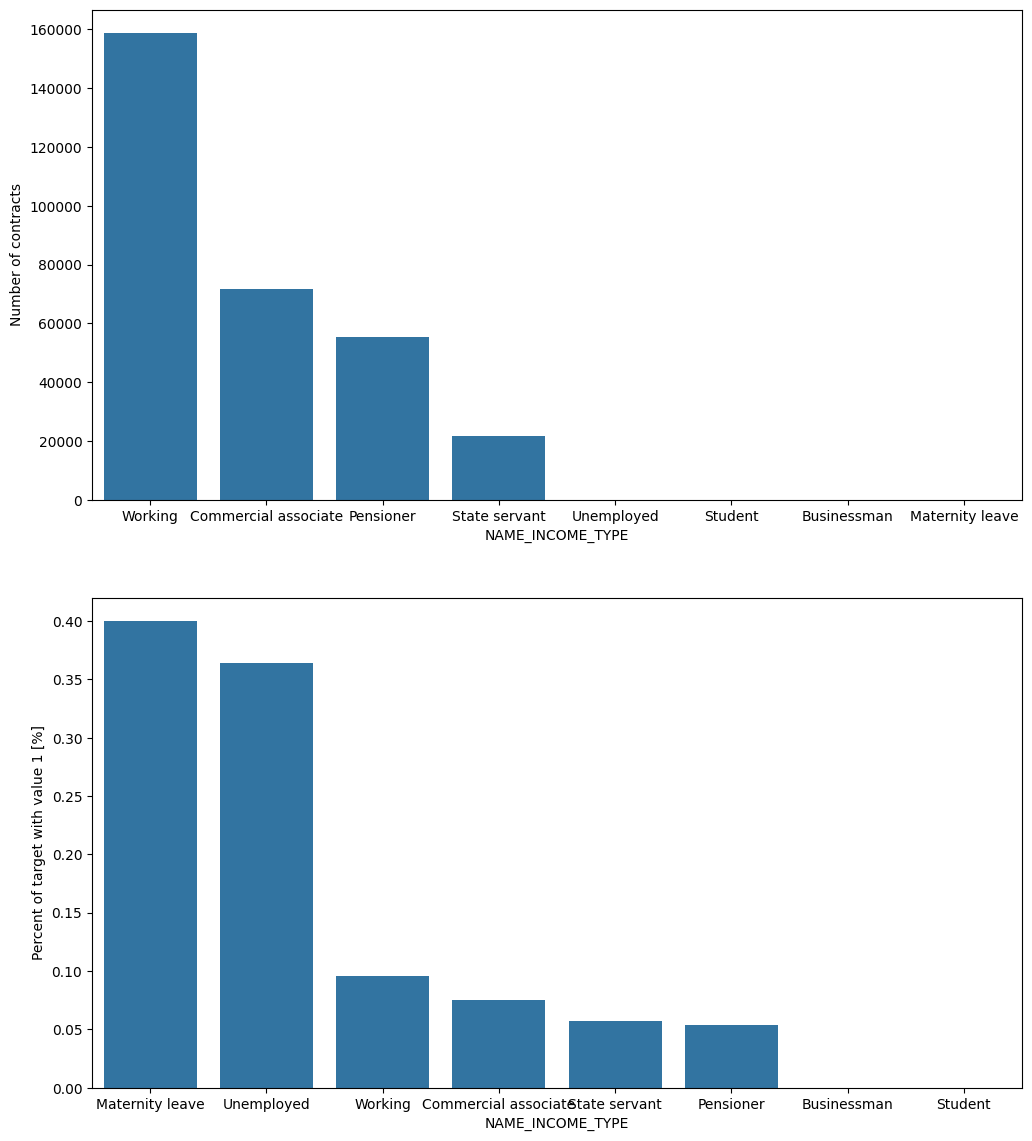

/tmp/ipykernel_2221951/1660549332.py:51: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)


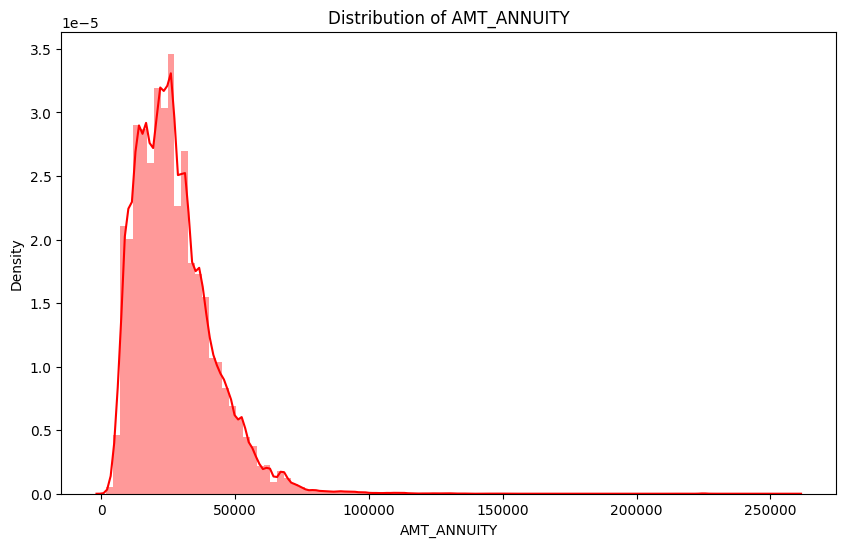

In [8]:
# 1. Unbalanced by target
# 2. too many missing values
j=0
for i in range (len(missing_info)):
    if missing_info.iloc[i,1] > 50:
        j = j + 1

#tempo = [['above 50%', j], ['below 50%', len(missing_info)-j]] 
df = pd.DataFrame({'labels': ['above 50 percent', 'below 50%'],
                   'features': [j, len(missing_info)-j]
                  })
plt.title('Missing value')
sns.barplot(x = 'labels', y="features", data=df)
#locs, labels = plt.xticks()
plt.show()

def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()
# 3. some stats
plot_stats('CODE_GENDER')
plot_stats('NAME_EDUCATION_TYPE')
plot_stats('OCCUPATION_TYPE')
plot_stats('NAME_INCOME_TYPE',False,False)

# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()   

plot_distribution('AMT_ANNUITY', 'red')